<a href="https://colab.research.google.com/github/ARUNDHATHY05/MACHINE-LEARNING/blob/main/kmeans_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


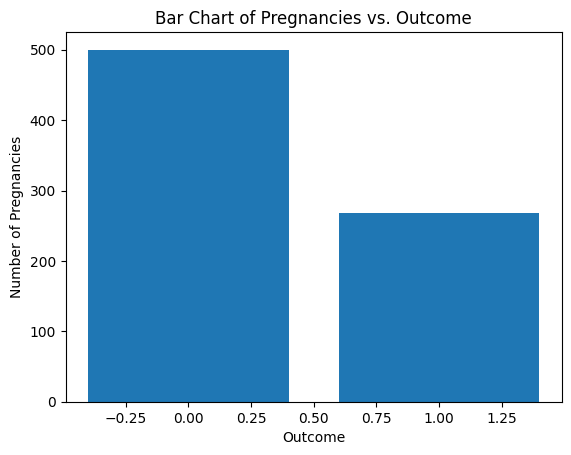

In [ ]:
import matplotlib.pyplot as plt

pregnancy_outcome_counts = df.groupby('Outcome')['Pregnancies'].count()

plt.bar(pregnancy_outcome_counts.index, pregnancy_outcome_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Number of Pregnancies')
plt.title('Bar Chart of Pregnancies vs. Outcome')
plt.show()

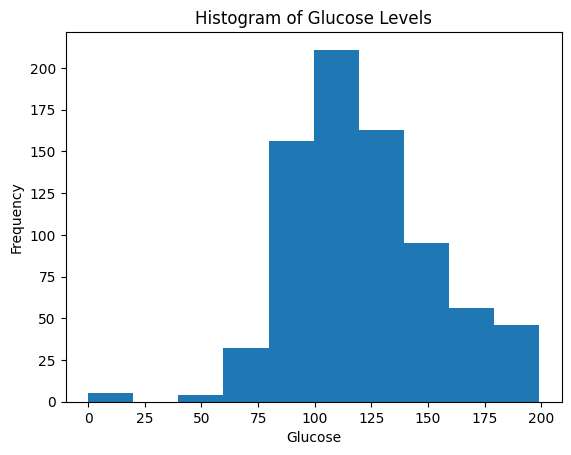

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of a specific column
plt.hist(df['Glucose'], bins=10)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Levels')
plt.show()



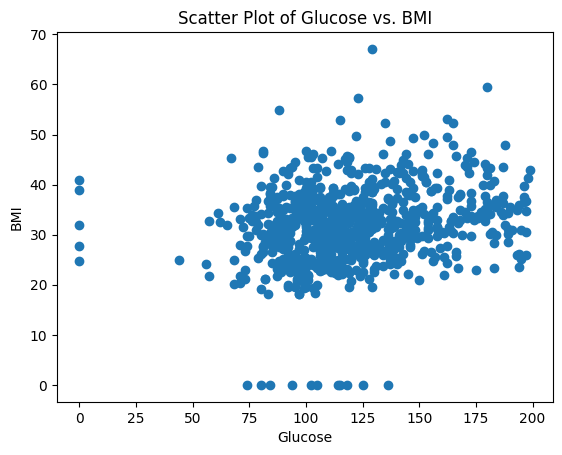

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot of two columns
plt.scatter(df['Glucose'], df['BMI'])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs. BMI')
plt.show()

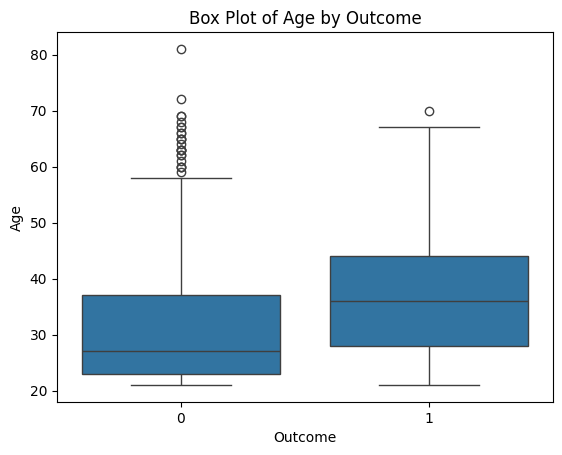

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of a specific column
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Box Plot of Age by Outcome')
plt.show()

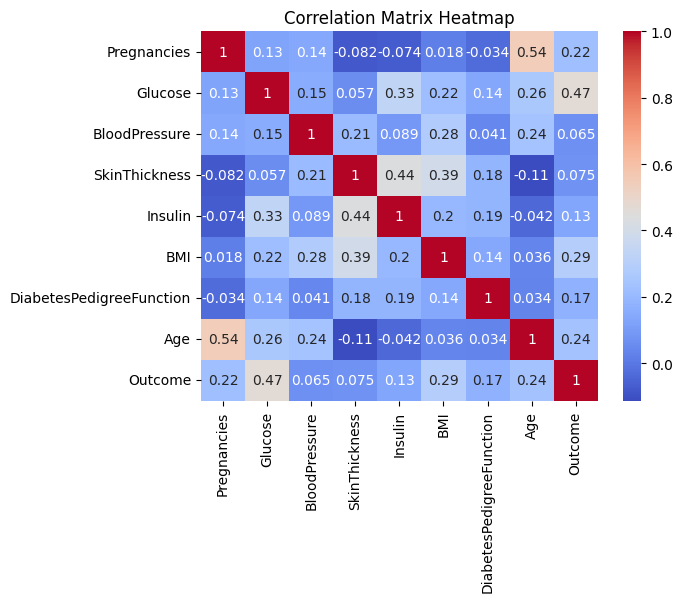

In [ ]:
import matplotlib.pyplot as plt # Keep this import
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

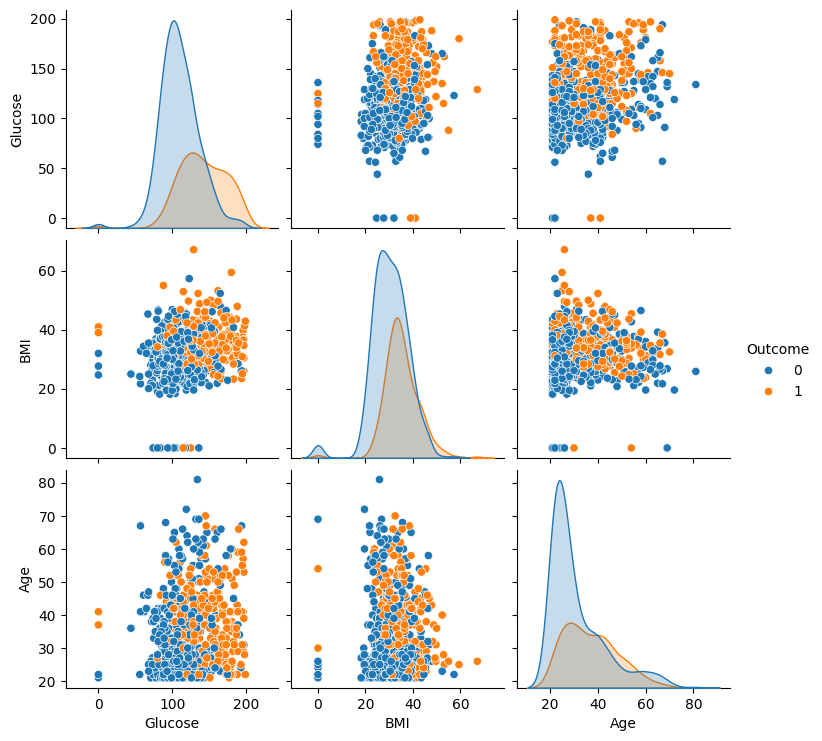

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for multiple variables
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

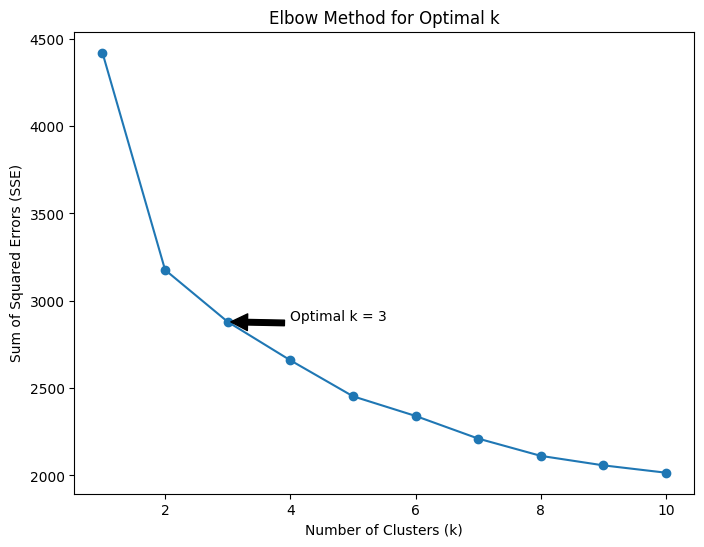

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Cluster  
0 -0.002592  0.019907 -0.017646        2  
1 -0.039493 -0.068332 -0.092204        0  
2 -0.002592  0.002861 -0.025930        2  
3  0.034309  0.022688 -0.009362        2  
4 -0.002592 -0.031988 -0.046641        0  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Find the optimal k using the elbow method
sse = []  # Sum of squared errors
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared errors for each k

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Choosing the optimal k from the elbow method, say k=3
optimal_k = 3

# Annotate the optimal k value on the plot
plt.annotate(f'Optimal k = {optimal_k}',
             xy=(optimal_k, sse[optimal_k - 1]),
             xytext=(optimal_k + 1, sse[optimal_k - 1] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.show()

# Fit KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the dataset
df['Cluster'] = clusters
print(df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Cluster  
0 -0.002592  0.019907 -0.017646        2  
1 -0.039493 -0.068332 -0.092204        0  
2 -0.002592  0.002861 -0.025930        2  
3  0.034309  0.022688 -0.009362        2  
4 -0.002592 -0.031988 -0.046641        0  


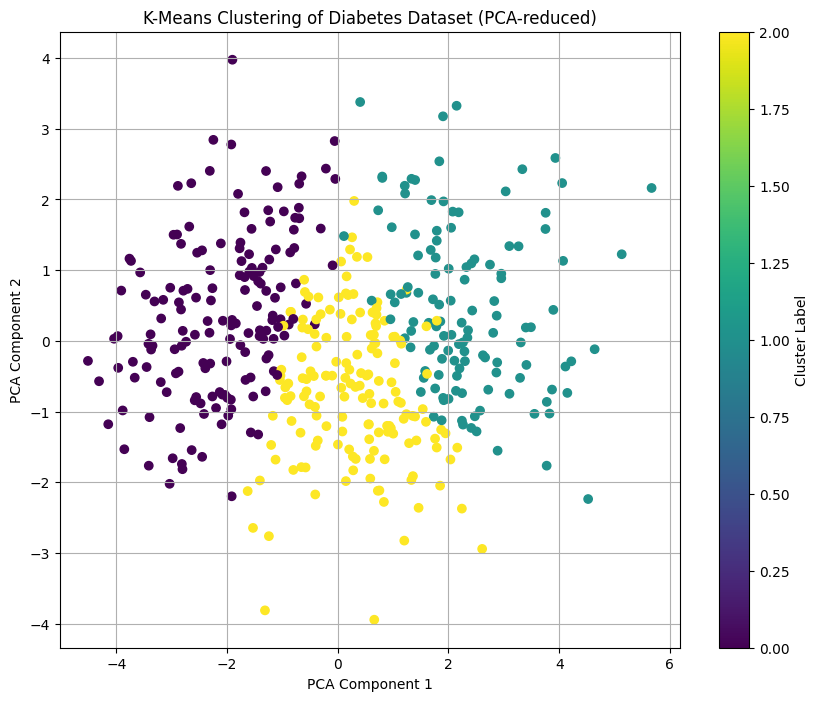

In [ ]:
# Assume the optimal k is determined from the elbow plot
optimal_k = 3  # Replace with the actual k you found from the elbow method

# Fit KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Show the first few rows of the dataframe with cluster labels
print(df.head())

# Optional: Visualizing the clusters using PCA (if dataset has more than 2 dimensions)
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Diabetes Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()
